&nbsp;

# Geographic Heat map of City of Toronto

&nbsp;
***

In [211]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
sns.set(style="darkgrid")
%matplotlib inline

&nbsp;
## 1. Read data
&nbsp;

In [212]:
print('')
print('')
data = pd.read_csv('forAnalysis/data.csv')
data.sample(5)

,neighbourhood,waste mass
353,Willowdale East,893.251120
1868,Yonge-eglinton,662.492017
1159,Birchcliffe-cliffside,647.271040
1749,Waterfront Communities-The Island,282.555969
2415,Weston-pellam Park,577.543163


&nbsp;
## 2. Read Shape File
&nbsp;

In [213]:
nb = 'forAnalysis/Neighbourhoods/Neighbourhoods.shp'
regions = gpd.read_file(nb)
regions['neighbourhood'] = regions['FIELD_7'].str.replace(' \(.+\)', '').str.lower()
regions.sample(5)

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry,neighbourhood
48,2149,25886994,25926710,49885,85,85,South Parkdale (85),South Parkdale (85),None,None,-79.439338,43.636700,16492273,4.369539e+06,14918.854844,"POLYGON ((-79.42778 43.62979, -79.42948 43.630...",south parkdale
24,2125,25886561,25926686,49885,50,50,Newtonbrook East (50),Newtonbrook East (50),None,None,-79.405937,43.791536,16491889,7.844180e+06,11218.654868,"POLYGON ((-79.42008 43.79800, -79.41973 43.798...",newtonbrook east
115,2216,25886774,25926777,49885,13,13,Etobicoke West Mall (13),Etobicoke West Mall (13),None,None,-79.568939,43.645063,16493345,3.433832e+06,8955.190853,"POLYGON ((-79.55959 43.63624, -79.55980 43.636...",etobicoke west mall
82,2183,25886558,25926744,49885,49,49,Bayview Woods-Steeles (49),Bayview Woods-Steeles (49),None,None,-79.382118,43.796802,16492817,7.853671e+06,11439.166125,"POLYGON ((-79.39623 43.80327, -79.39443 43.803...",bayview woods-steeles
139,2240,25886439,25926801,49885,117,117,L'Amoreaux (117),L'Amoreaux (117),None,None,-79.314084,43.795716,16493729,1.374128e+07,17413.886402,"POLYGON ((-79.28857 43.79607, -79.28921 43.795...",l'amoreaux


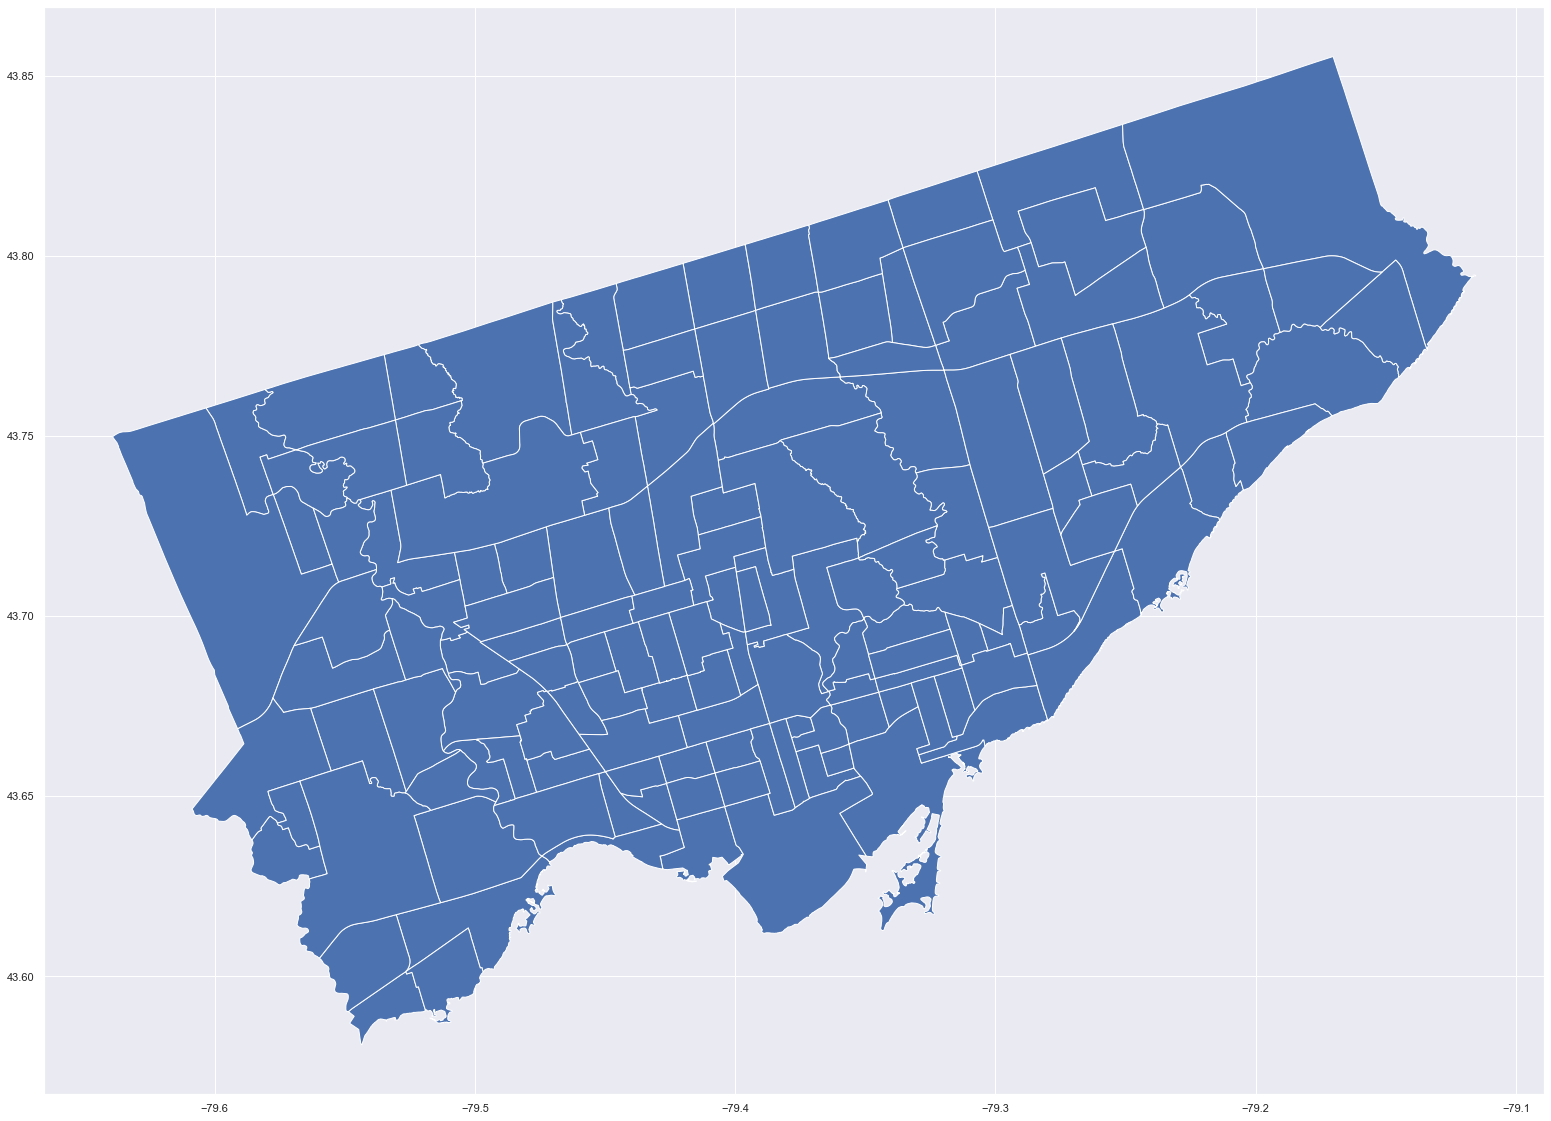

In [214]:
regions.plot(figsize=(40,20))
plt.show()

&nbsp;
## 3. Group By Neighbourhood and Count
&nbsp;

In [215]:
# print('')
# print('')
# data['count'] = 1
# dataByNeighbourhood = data.groupby('neighbourhood').sum()[['count']].reset_index()
# # dataByNeighbourhood = data.groupby('neighbourhood').count()[['count']].reset_index()
# dataByNeighbourhood['neighbourhood'] = dataByNeighbourhood['neighbourhood'].str.lower()
# dataByNeighbourhood.sort_values('count', ascending=False).head(10)

In [216]:
_k = dict()

for (nb, ma) in zip(data['neighbourhood'], data['waste mass']):
    nb = nb.lower()
    if nb in _k:
        _k[nb] += ma
    else:
        _k[nb] = ma

In [217]:
_k

{'waterfront communities-the island': 149859.84158570008,
 'newtonbrook east': 15053.980430899996,
 'york university heights': 13201.8890981,
 'dorset park': 14914.2068272,
 'englemount-lawrence': 8316.561564700001,
 'bay street corridor': 60225.15716719999,
 'yorkdale-glen park': 14807.190297199997,
 'agincourt south-malvern west': 19153.8243277,
 'stonegate-queensway': 15613.520258300003,
 'parkwoods-donalda': 11807.7828561,
 'south riverdale': 21895.710700699994,
 'newtonbrook west': 15252.222043499998,
 'church-yonge corridor': 67098.68917130001,
 'mount olive-silverstone-jamestown': 20070.110666199995,
 'casa loma': 7041.805440599999,
 'downsview-roding-cfb': 18623.343322299996,
 'kennedy park': 9340.146750400001,
 'rouge': 8322.875623299999,
 'princess-rosethorn': 6433.1242526,
 'willowdale west': 15477.366228299998,
 'bayview village': 36356.9465902,
 'mimico': 83877.97462750005,
 'willowdale east': 82515.28994570003,
 'henry farm': 22192.732597500002,
 'agincourt north': 14268.

In [218]:
max_value = max(_k.values())
max_value

# min_value = min(_k.values())
# min_value

149859.84158570008

&nbsp;
## 4. Join The Dataset with Shape File
&nbsp;

In [219]:
_k.keys()

dict_keys(['waterfront communities-the island', 'newtonbrook east', 'york university heights', 'dorset park', 'englemount-lawrence', 'bay street corridor', 'yorkdale-glen park', 'agincourt south-malvern west', 'stonegate-queensway', 'parkwoods-donalda', 'south riverdale', 'newtonbrook west', 'church-yonge corridor', 'mount olive-silverstone-jamestown', 'casa loma', 'downsview-roding-cfb', 'kennedy park', 'rouge', 'princess-rosethorn', 'willowdale west', 'bayview village', 'mimico', 'willowdale east', 'henry farm', 'agincourt north', 'edenbridge-humber valley', 'pleasant view', 'west humber-clairville', 'banbury-don mills', 'woburn', 'west hill', 'etobicoke west mall', 'niagara', 'high park-swansea', 'bridle path-sunnybrook-york mills', 'scarborough village', 'clanton park', 'little portugal', 'mount pleasant east', 'kingsview village-the westway', 'university', 'don valley village', 'the beaches', 'mount pleasant west', 'islington-city centre west', 'moss park', 'corso italia-davenport

In [220]:
# dataByNeighbourhood = pd.DataFrame.from_dict(_k, orient='index')
# dataByNeighbourhood

In [221]:
# Join the dataset with the available mapping files.
# We will fill in the neighbourhoods which were not present in the dataset with 0.
# this way we will still see the neighbourhood in the map, but no housing will be shown on it.


merged = regions.set_index('neighbourhood').join(dataByNeighbourhood)
merged = merged.reset_index()
merged = merged.fillna(0)
merged.rename(columns={merged.columns[-1]: 'count'}, inplace = True)
# merged[['neighbourhood', 'FIELD_11', 'FIELD_12', 'geometry', 'count']]

# merged

In [222]:
# merged['neighbourhood']
# _l = dict()
# for (idx, name) in enumerate(merged['neighbourhood']):
#     _l[name] = idx

In [223]:
merged

,neighbourhood,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry,count
0,wychwood,2101,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),0,0,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",2404.588366
1,yonge-eglinton,2102,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),0,0,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"POLYGON ((-79.41096 43.70408, -79.40962 43.704...",9707.929903
2,yonge-st.clair,2103,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),0,0,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",0.000000
3,york university heights,2104,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),0,0,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",13201.889098
4,yorkdale-glen park,2105,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),0,0,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",14807.190297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,kennedy park,2236,25886531,25926797,49885,124,124,Kennedy Park (124),Kennedy Park (124),0,0,-79.260382,43.725556,16493665,6.861056e+06,10530.202433,"POLYGON ((-79.24549 43.73060, -79.24555 43.730...",9340.146750
136,kensington-chinatown,2237,25886955,25926798,49885,78,78,Kensington-Chinatown (78),Kensington-Chinatown (78),0,0,-79.397240,43.653554,16493681,2.933586e+06,6945.056557,"POLYGON ((-79.40401 43.64719, -79.40419 43.647...",14670.440826
137,kingsview village-the westway,2238,25886737,25926799,49885,6,6,Kingsview Village-The Westway (6),Kingsview Village-The Westway (6),0,0,-79.547863,43.698993,16493697,9.694496e+06,14458.764271,"POLYGON ((-79.55236 43.70947, -79.55229 43.709...",22746.724011
138,kingsway south,2239,25886763,25926800,49885,15,15,Kingsway South (15),Kingsway South (15),0,0,-79.510577,43.653520,16493713,5.043477e+06,11140.672714,"POLYGON ((-79.51703 43.64611, -79.51717 43.646...",6225.379842


In [224]:
# for name in merged['neighbourhood']:
#     name = name.lower()
#     if name in _k.keys():
#         merged['count'][_l[name]] = _k[name]
#     else:
#         merged['count'][_l[name]] = 0.0
#         print(f"{name} not found")

In [225]:
merged

,neighbourhood,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry,count
0,wychwood,2101,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),0,0,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",2404.588366
1,yonge-eglinton,2102,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),0,0,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"POLYGON ((-79.41096 43.70408, -79.40962 43.704...",9707.929903
2,yonge-st.clair,2103,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),0,0,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",0.000000
3,york university heights,2104,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),0,0,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",13201.889098
4,yorkdale-glen park,2105,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),0,0,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",14807.190297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,kennedy park,2236,25886531,25926797,49885,124,124,Kennedy Park (124),Kennedy Park (124),0,0,-79.260382,43.725556,16493665,6.861056e+06,10530.202433,"POLYGON ((-79.24549 43.73060, -79.24555 43.730...",9340.146750
136,kensington-chinatown,2237,25886955,25926798,49885,78,78,Kensington-Chinatown (78),Kensington-Chinatown (78),0,0,-79.397240,43.653554,16493681,2.933586e+06,6945.056557,"POLYGON ((-79.40401 43.64719, -79.40419 43.647...",14670.440826
137,kingsview village-the westway,2238,25886737,25926799,49885,6,6,Kingsview Village-The Westway (6),Kingsview Village-The Westway (6),0,0,-79.547863,43.698993,16493697,9.694496e+06,14458.764271,"POLYGON ((-79.55236 43.70947, -79.55229 43.709...",22746.724011
138,kingsway south,2239,25886763,25926800,49885,15,15,Kingsway South (15),Kingsway South (15),0,0,-79.510577,43.653520,16493713,5.043477e+06,11140.672714,"POLYGON ((-79.51703 43.64611, -79.51717 43.646...",6225.379842


&nbsp;
## 5. Plot the Map
&nbsp;

<ipython-input-226-4837b14798b0>:27: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),


TypeError: 'module' object is not iterable

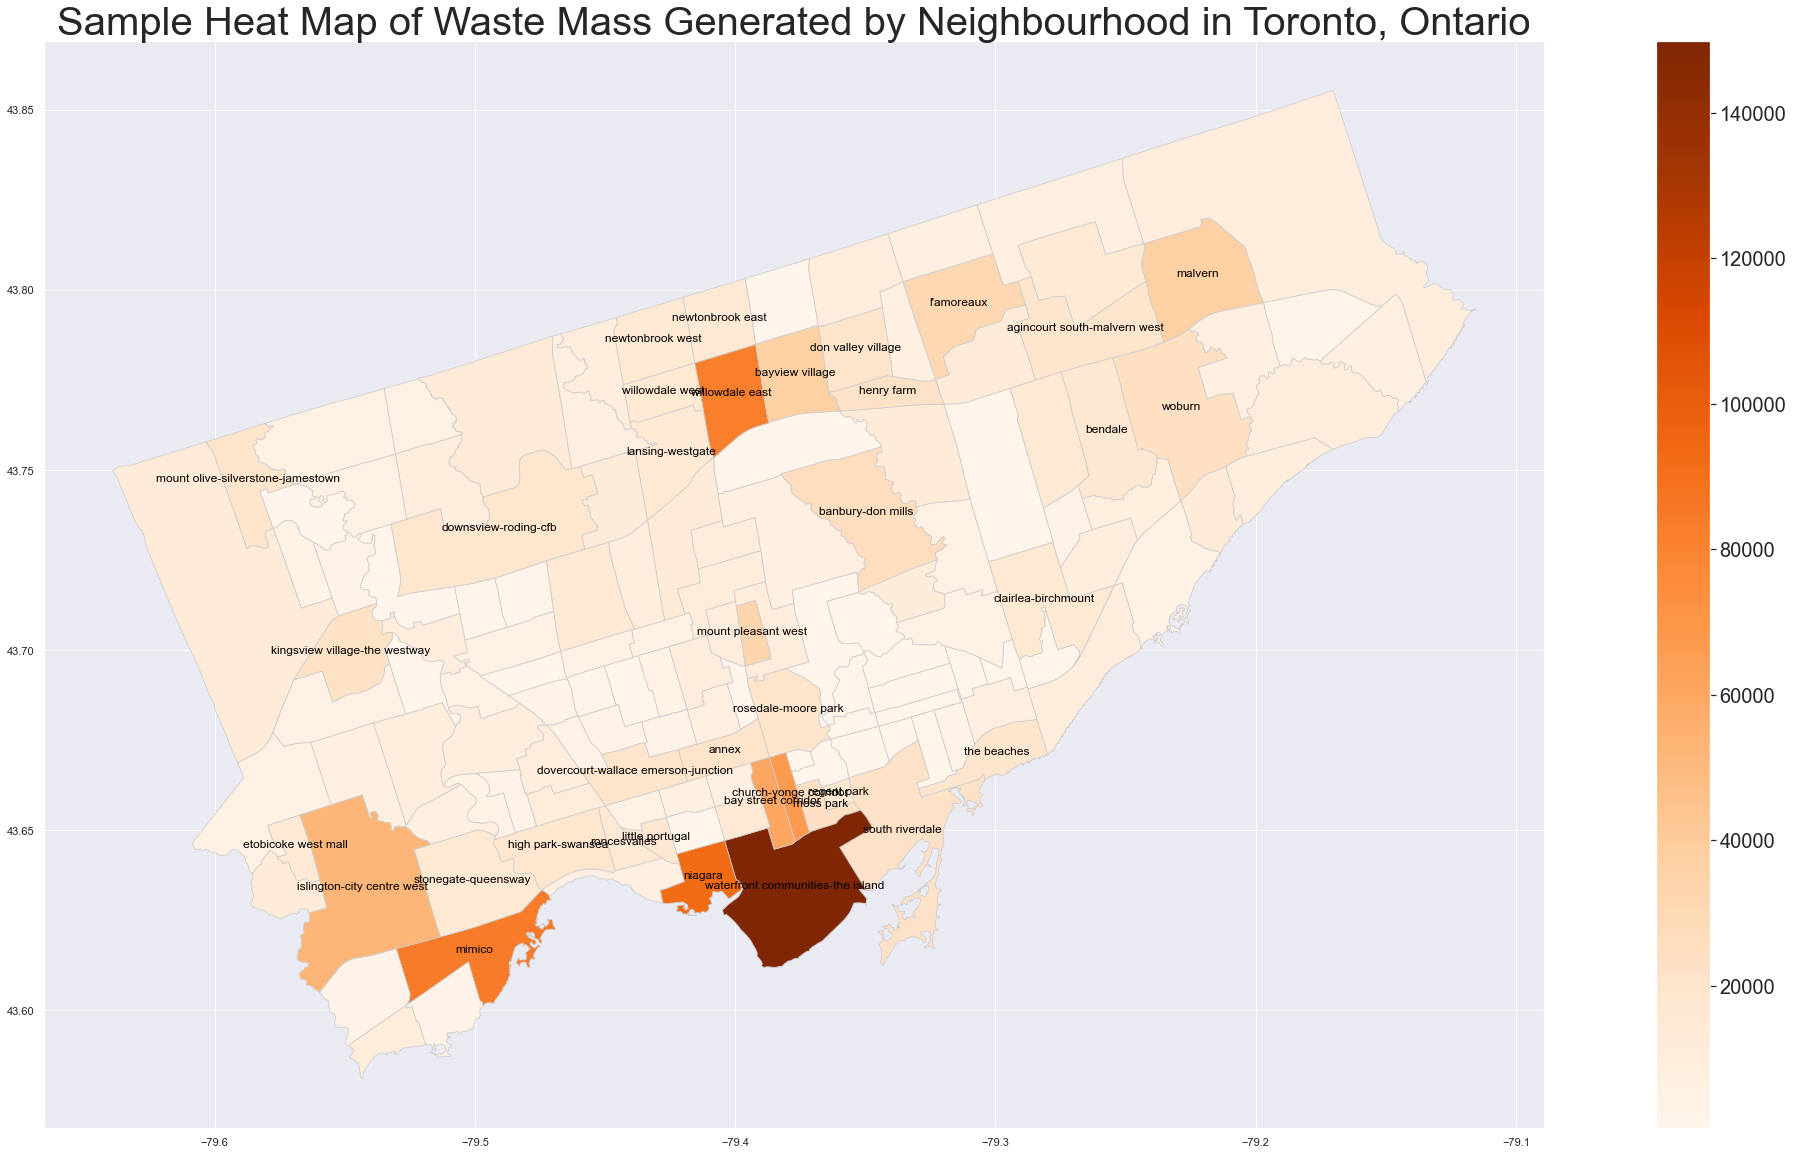

In [226]:
# we are using the maximum and minimum count values from the previous cell.
# setting additionally properties for the plot such as titles, turning of the axis for better visibility
# and setting the color scheme to look like a heat map.
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Sample Heat Map of Waste Mass Generated by Neighbourhood in Toronto, Ontario', fontdict={'fontsize': '40', 'fontweight' : '3'}, )
ax.set_axis_on()


# Create colorbar as a legend
# empty array for the data range
# add the colorbar to the figure
# set the color bar label text size
color = 'Oranges'
vmin, vmax = 418, 149860
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)


# actually plot the map
# we will only annotate the plot for neighbourhoods with more than 15000 kg of wastes
merged.plot('count', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in merged.iterrows():
    if(row['count'] > 15000):
        plt.annotate(s=row['neighbourhood'], xy=(row['FIELD_11'], row['FIELD_12']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)
adjust_text(plt, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
plt.show()